In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("archivos-ejercicios/world_data_full_apply_nulos.csv", index_col=0) 
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               195 non-null    object 
 1   density                               195 non-null    float64
 2   abbreviation                          188 non-null    object 
 3   agricultural_land                     188 non-null    float64
 4   land_area                             165 non-null    float64
 5   armed_forces_size                     166 non-null    float64
 6   birth_rate                            189 non-null    float64
 7   calling_code                          194 non-null    float64
 8   capital/major_city                    192 non-null    object 
 9   co2-emissions                         183 non-null    float64
 10  cpi                                   175 non-null    float64
 11  cpi_change              

1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

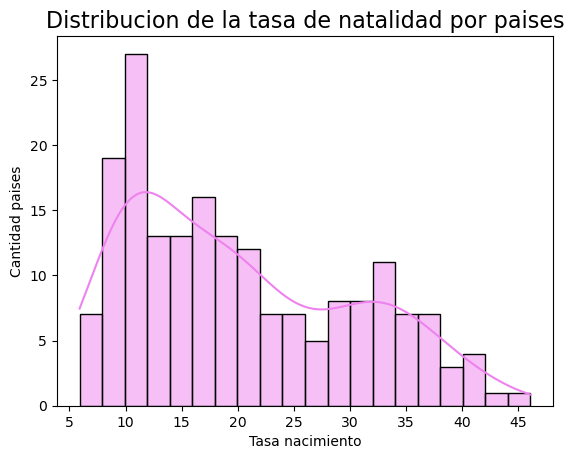

In [4]:
sns.histplot(x = "birth_rate", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 );

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
plt.xlabel("Tasa nacimiento")
# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
plt.ylabel("Cantidad paises");

# ponemos un título usando el método 'plt.title()'
# en este caso lo que hemos añadido es al parámetro 'fontsize' que nos permite cambiar el tamaño del título
plt.title("Distribucion de la tasa de natalidad por paises", fontsize = 16);

La tasa de natalidad entre paises tiene una tendencia baja (7-12 como maxima distribucion) en la mayoria de los paises 

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

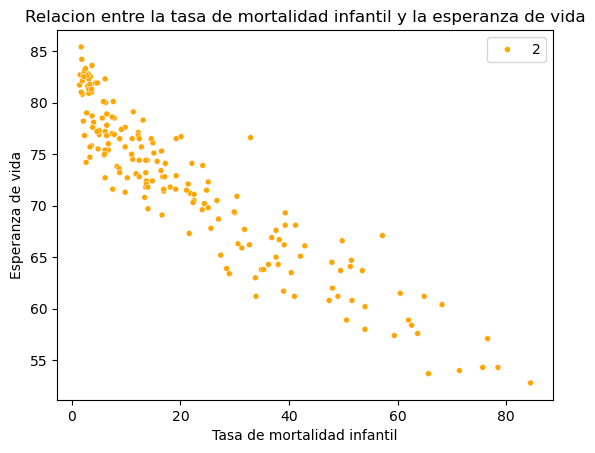

In [7]:
# Usamos scatterplot para relacionar las variables numericas infant_mortality y life_expectancy 
sns.scatterplot(x = "infant_mortality", 
                y = "life_expectancy", 
                data = df, 
                size = 2, 
                color = "orange");


# cambiamos los nombres de los ejes
plt.xlabel("Tasa de mortalidad infantil")
plt.ylabel("Esperanza de vida");


plt.title("Relacion entre la tasa de mortalidad infantil y la esperanza de vida", fontsize = 12);

Existe una correlacion negativa entre las variables a evaluar y se observa que los paises con una mayor tasa de mortalidad infantil son aquellos que tienen una menor esperanza de vida

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [8]:
# Relacion entre 2 variables object: continent y country -> variables categoricas -> pieplot 
# Creamos una tabla secundaria
# empezamos preparando los datos para poder hacer el pieplot usando un groupby. En este caso tendremos que contar el número de clientes que tenemos por nivel educativo
df_continentes = df.groupby("continent")["country"].count().reset_index()
df_continentes

,continent,country
0,Africa,53
1,Asia,45
2,Central America,20
3,Europe,47
4,North America,2
5,Oceania,14
6,South America,13


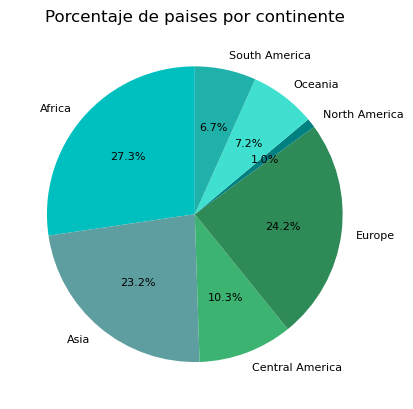

In [10]:
# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("country", labels= "continent",
        data = df_continentes, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

plt.title("Porcentaje de paises por continente", fontsize = 12);

El continente con un mayor porcentaje de paises es Africa, seguido de Asia y Europa

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

/tmp/ipykernel_28290/2612885150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "life_expectancy",


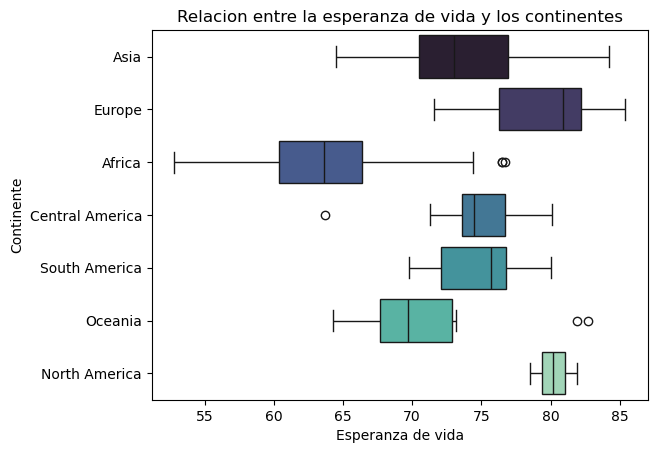

In [13]:
#Relacion entre una variable numerica life_expectancy y una categorica continent -> como nos piden la mediana -> boxplot
sns.boxplot(x = "life_expectancy",
            y = "continent", 
            data = df, 
            palette= "mako");

# cambiamos los nombres de los ejes
plt.xlabel("Esperanza de vida")
plt.ylabel("Continente");


plt.title("Relacion entre la esperanza de vida y los continentes", fontsize = 12);

- La mediana en la esperanza de vida en Europa esta situada entorno a los 80
- Rango intercualtil:
    - El 25% de la poblacion del continente europeo tiene una esperanza de vida comprendida entre los de 72 - 77 anios 
    - El 50% de la poblacion del continente europeo tiene una esperanza de vida comprendida entre los de 72 - 80 anios
    - El 75% de la poblacion del continente europeo tiene una esperanza de vida comprendida entre los de 72 - 82 anios  
- Conclusion general: el 50% de la poblacion tiene una esperanza de vida comprendida entre los 76-82 anios en Europa
- No se aprencian valores atipicos en Europa

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.